## Exploring the dataset

Since we have a collection of images instead of tabular data, there are limited number of operations to get a general understanding of the dataset. 


In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image

## 1. Creating a Dataframe 

Having a list of general properties of images is insightful to assess image quality, computational load, etc. The code snippet given below creates a dateframe provides classification information as well as image size (in kb) and resolution.  

In [4]:
path = "../data"
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": [],
    "image_size":[],
    "image_resolution": []
}

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+"/"+where+"/"+status+"/"+"*.jpg"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
            dataset["image_size"].append(round((os.path.getsize(image)/1000),2))
            img = Image.open(image)
            width, height = img.size
            dataset["image_resolution"].append((width,height))
            
dataset = pd.DataFrame(dataset)
dataset.sample(10)

,image_path,mask_status,where,image_size,image_resolution
1191,../data/test/with_mask/with_mask_643.jpg,with_mask,test,16.40,"(297, 455)"
675,../data/train/without_mask/without_mask_320.jpg,without_mask,train,12.92,"(245, 206)"
921,../data/validation/with_mask/with_mask_471.jpg,with_mask,validation,19.88,"(340, 417)"
710,../data/train/without_mask/without_mask_352.jpg,without_mask,train,52.70,"(320, 433)"
350,../data/train/with_mask/with_mask_398.jpg,with_mask,train,29.07,"(320, 433)"
87,../data/train/with_mask/with_mask_163.jpg,with_mask,train,22.34,"(379, 465)"
176,../data/train/with_mask/with_mask_244.jpg,with_mask,train,26.05,"(398, 576)"
218,../data/train/with_mask/with_mask_281.jpg,with_mask,train,43.85,"(720, 720)"
47,../data/train/with_mask/with_mask_127.jpg,with_mask,train,8.85,"(238, 212)"
528,../data/train/without_mask/without_mask_020.jpg,without_mask,train,44.34,"(441, 494)"


## 2. Check labeling

In [1]:
data_path='../data/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)

{'with_mask': 0, 'without_mask': 1}


## 3. Visual Assessment

Beside numerical information provided in dataset, it is also helpful to have a look to the images. The code snippet given below picks random images from the whole dataset (train, validation and test) and shows them with their labels (note that it uses the DataFrame created above). It is useful to investigate figures and checking the labeling errors (if exists).

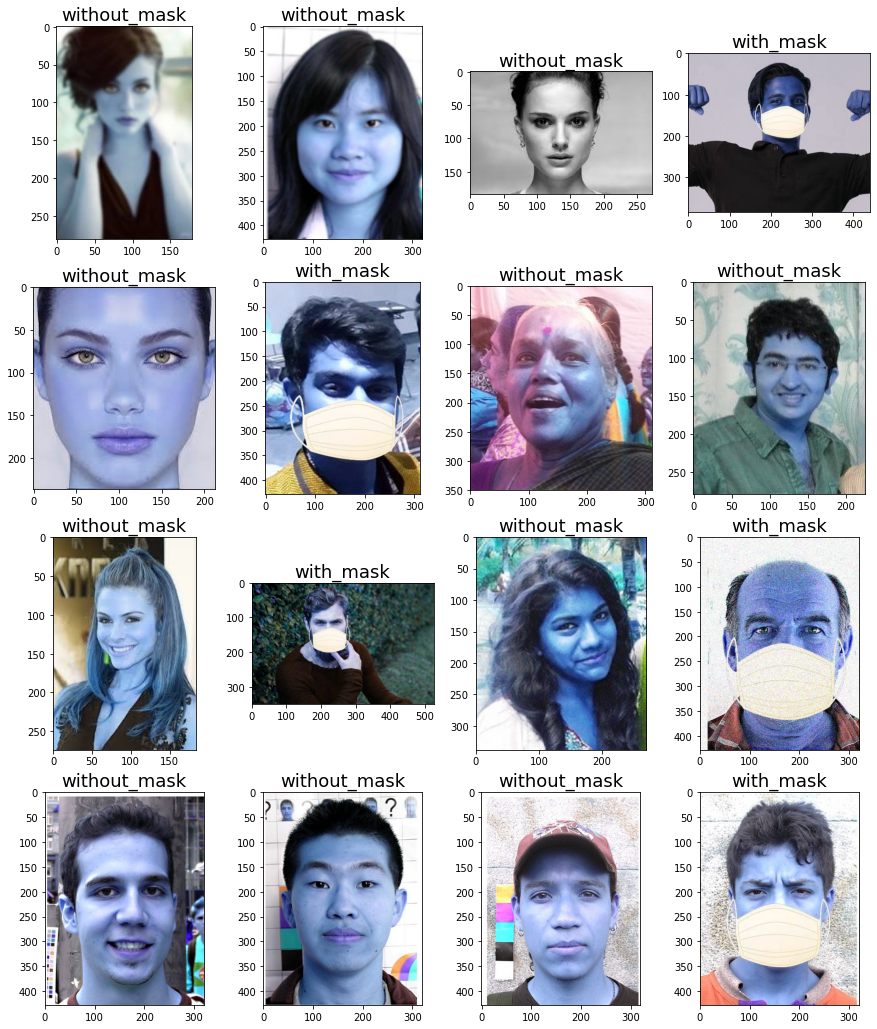

In [8]:
plt.figure(figsize = (15, 18))

for i in range(16):
    random = np.random.randint(1, len(dataset))
    plt.subplot(4, 4, i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random,"mask_status"], size = 18)
  
plt.show()

## 4. Checking the distribution of images among sub-groups

The single line given below shows the number of images under each dataset and class.

In [9]:
dataset.groupby(by=["where","mask_status"]).count().sort_values(by='image_path',ascending=False)

image_path  image_size  image_resolution
where      mask_status                                           
train      with_mask            412         412               412
           without_mask         412         412               412
test       with_mask            137         137               137
           without_mask         137         137               137
validation with_mask            137         137               137
           without_mask         137         137               137

## 5. Checking image properties

Checking the image size (kb) and resolution is helpfull to estimate the computational load and to set the parameters for image preprocesssing. As an example, it is a common practice to 

In [88]:
# Check image properties

size = round(dataset['image_size'].mean(),2)
print(f'The average image size is {size} kb')

width = []
for i in dataset.image_resolution:
    width.append(i[0])

height = []
for i in dataset.image_resolution:
    height.append(i[0])

print(f'The average image resolution is {int(mean(width))}x{int(mean(height))}')
print(f'The min image width is {int(min(width))} pixels')
print(f'The min image height is {int(min(height))} pixels')

The average image size is 30.6 kb
The average image resolution is 325x325
The min image width is 110 pixels
The min image height is 110 pixels
